In [184]:
import numpy as np
import matplotlib.pyplot as plt

class Graph:
    
    def __init__(self, mat = np.matrix('0 1; 1 0')):
        
        # check if mat is square
        if mat.shape[0] != mat.shape[1]:
            print("Err: Adjacency matrix not square.")
            return

        # check if mat is symmetrical
        if not np.array_equal(np.array(np.transpose(mat)), np.array(mat)):
            print("Err: Adjacency matrix not symmetrical.")
            return
        
        # adjacency matrix
        self.mat = mat
        
        # sum of entire matrix
        self.sum = sum(sum(np.array(self.mat)))
        # sum of matrix diagonal
        self.diagSum = sum(np.diag(self.mat))
        
        # vertices array
        self.vertices = [chr(ord('a')+ v) for v in range(len(mat))]
        
        # edges array
        self.edges = []
        # init edges array
        for i in range(len(self.vertices)):
            for j in range(len(self.vertices)):
                # if number of edges in mat > 0, concat characters in vertices array
                for k in range(np.array(np.triu(self.mat))[i][j]):
                    self.edges.append(self.vertices[i] + self.vertices[j])
                    
        # neighborhood of each vertex
        self.neighborhoods = []
         # init neighborhoods array
        for row in np.array(self.mat):
            i = 0
            n = []
            for col in row:
                if col > 0:
                    n.append(self.vertices[i])
                i += 1
            self.neighborhoods.append(n)
                    
        
        # degree of each vertex
        self.degrees = [sum(row) for row in np.array(mat)]
                
        # is graph simple? check for diagonal 0
        self.isSimple = True if self.diagSum == 0 else False
        # is graph simple? check for multiple edges
        for row in np.array(self.mat):
            for col in row:
                if(col > 1):
                    self.isSimple = False
                    break
        
        # is graph complete?
        self.isComplete = True if self.sum == len(self.vertices)**2 - len(self.vertices) and self.diagSum == 0 else False
    
        # is graph a cycle?
        self.isCycle = True if self.sum == 2*len(self.vertices) and self.diagSum == 0 else False
    
    def __repr__(self):
        return f"{self.mat}\nVertices: {self.vertices}\nNeighborhoods: {self.neighborhoods}\nDegrees: {self.degrees}\nEdges: {self.edges}\nSimple? {self.isSimple}\nComplete? {self.isComplete}\nCycle? {self.isCycle}"
    
# k4 = Graph(np.matrix('0 1 1 1; 1 0 1 1; 1 1 0 1; 1 1 1 0'))       
# g = Graph(np.matrix('0 1 1;1 0 1; 1 1 0'))
g = Graph(np.matrix('0 1 1 1;1 0 1 1; 1 1 0 1; 1 1 1 0'))
g

[[0 1 1 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]
Vertices: ['a', 'b', 'c', 'd']
Neighborhoods: [['b', 'c', 'd'], ['a', 'c', 'd'], ['a', 'b', 'd'], ['a', 'b', 'c']]
Degrees: [3, 3, 3, 3]
Edges: ['ab', 'ac', 'ad', 'bc', 'bd', 'cd']
Simple? True
Complete? True
Cycle? False

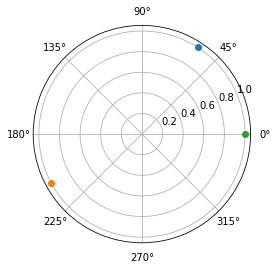

[[0 1 1]
 [1 0 1]
 [1 1 0]]
Vertices: ['a', 'b', 'c']
Neighborhoods: [['b', 'c'], ['a', 'c'], ['a', 'b']]
Degrees: [2, 2, 2]
Edges: ['ab', 'ac', 'bc']
Simple? True
Complete? True
Cycle? True

In [445]:
h = Graph(np.matrix('0 1 1; 1 0 1; 1 1 0'))
x = np.linspace(1, 2*np.pi, len(h.vertices))

# plot points
for i in x:
    plt.polar(i, i/i,'-o')

plt.show()
h